In [3]:
from torch.utils.data import DataLoader
import torch

t = torch.arange(10, dtype=torch.float32)
t_loader = DataLoader(t)
for item in t_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])
tensor([6.])
tensor([7.])
tensor([8.])
tensor([9.])


In [6]:
t_loader = DataLoader(t, batch_size=3, drop_last=False)  # default drop_last is False.
for batch_idx, batch in enumerate(iterable=t_loader, start=1):
    print(f"batch {batch_idx}: {batch}")

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])
batch 3: tensor([6., 7., 8.])
batch 4: tensor([9.])


In [14]:
from torch.utils.data import Dataset, TensorDataset

t_X = torch.rand(size=[6, 3], dtype=torch.float32)
print(f"tensor of features: \n{t_X}\n")
t_y = torch.arange(6, dtype=torch.float32)
print(f"tensor of labels: \n{t_y}\n")
t_dataset = TensorDataset(t_X, t_y)
for sample in t_dataset:
    print(f"X: {sample[0]}, y: {sample[1]}")

tensor of features: 
tensor([[0.1106, 0.1678, 0.8801],
        [0.0349, 0.8621, 0.4962],
        [0.3638, 0.5846, 0.3197],
        [0.6445, 0.5105, 0.7919],
        [0.0742, 0.0317, 0.5519],
        [0.4173, 0.4360, 0.7641]])

tensor of labels: 
tensor([0., 1., 2., 3., 4., 5.])

X: tensor([0.1106, 0.1678, 0.8801]), y: 0.0
X: tensor([0.0349, 0.8621, 0.4962]), y: 1.0
X: tensor([0.3638, 0.5846, 0.3197]), y: 2.0
X: tensor([0.6445, 0.5105, 0.7919]), y: 3.0
X: tensor([0.0742, 0.0317, 0.5519]), y: 4.0
X: tensor([0.4173, 0.4360, 0.7641]), y: 5.0


In [15]:
class JointDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


joint_dataset = JointDataset(t_X, t_y)
for sample in joint_dataset:
    print(f"X: {sample[0]}, y: {sample[1]}")

X: tensor([0.1106, 0.1678, 0.8801]), y: 0.0
X: tensor([0.0349, 0.8621, 0.4962]), y: 1.0
X: tensor([0.3638, 0.5846, 0.3197]), y: 2.0
X: tensor([0.6445, 0.5105, 0.7919]), y: 3.0
X: tensor([0.0742, 0.0317, 0.5519]), y: 4.0
X: tensor([0.4173, 0.4360, 0.7641]), y: 5.0


In [20]:
t_loader = DataLoader(dataset=t_dataset, batch_size=4, shuffle=True)
for batch_idx, batch in enumerate(iterable=t_loader, start=1):
    print(f"batch {batch_idx}:\n X: {batch[0]},\n y: {batch[1]}\n")

batch 1:
 X: tensor([[0.3638, 0.5846, 0.3197],
        [0.4173, 0.4360, 0.7641],
        [0.0742, 0.0317, 0.5519],
        [0.0349, 0.8621, 0.4962]]),
 y: tensor([2., 5., 4., 1.])

batch 2:
 X: tensor([[0.6445, 0.5105, 0.7919],
        [0.1106, 0.1678, 0.8801]]),
 y: tensor([3., 0.])



In [22]:
t_loader = DataLoader(dataset=t_dataset, batch_size=2, shuffle=True)
for epoch in range(2):
    print(f"epoch: {epoch + 1}")
    for batch_idx, batch in enumerate(iterable=t_loader, start=1):
        print(f"batch {batch_idx}:\n X: {batch[0]},\n y: {batch[1]}\n")

epoch: 1
batch 1:
 X: tensor([[0.0349, 0.8621, 0.4962],
        [0.0742, 0.0317, 0.5519]]),
 y: tensor([1., 4.])

batch 2:
 X: tensor([[0.1106, 0.1678, 0.8801],
        [0.4173, 0.4360, 0.7641]]),
 y: tensor([0., 5.])

batch 3:
 X: tensor([[0.6445, 0.5105, 0.7919],
        [0.3638, 0.5846, 0.3197]]),
 y: tensor([3., 2.])

epoch: 2
batch 1:
 X: tensor([[0.4173, 0.4360, 0.7641],
        [0.6445, 0.5105, 0.7919]]),
 y: tensor([5., 3.])

batch 2:
 X: tensor([[0.3638, 0.5846, 0.3197],
        [0.1106, 0.1678, 0.8801]]),
 y: tensor([2., 0.])

batch 3:
 X: tensor([[0.0349, 0.8621, 0.4962],
        [0.0742, 0.0317, 0.5519]]),
 y: tensor([1., 4.])



In [24]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


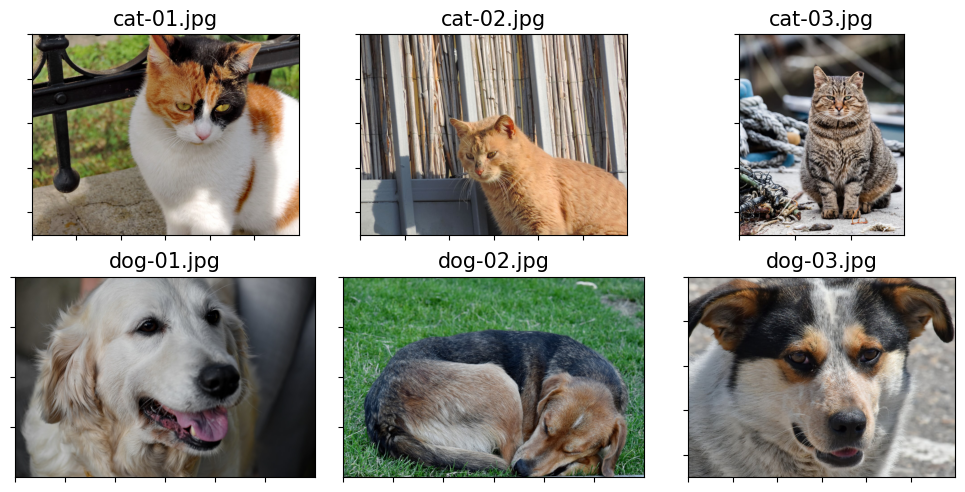

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))  # Width, height 
for i, file in enumerate(file_list):
    img = Image.open(file)
    print(f"Image shape: {np.array(img).shape}")
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [28]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [36]:
class CatDogDataset(Dataset):
    def __init__(self, files: list, labels: list):
        self.files = files
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        file = self.files[idx]  # 注意 file 不是 img
        label = self.labels[idx]
        return file, label


image_dataset = CatDogDataset(files=file_list, labels=labels)
for batch_idx, batch in enumerate(iterable=image_dataset, start=1):
    print(f"batch {batch_idx}:\n X: {batch[0]}, y: {batch[1]}")

batch 1:
 X: cat_dog_images\cat-01.jpg, y: 0
batch 2:
 X: cat_dog_images\cat-02.jpg, y: 0
batch 3:
 X: cat_dog_images\cat-03.jpg, y: 0
batch 4:
 X: cat_dog_images\dog-01.jpg, y: 1
batch 5:
 X: cat_dog_images\dog-02.jpg, y: 1
batch 6:
 X: cat_dog_images\dog-03.jpg, y: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0005550324..1.0000002].


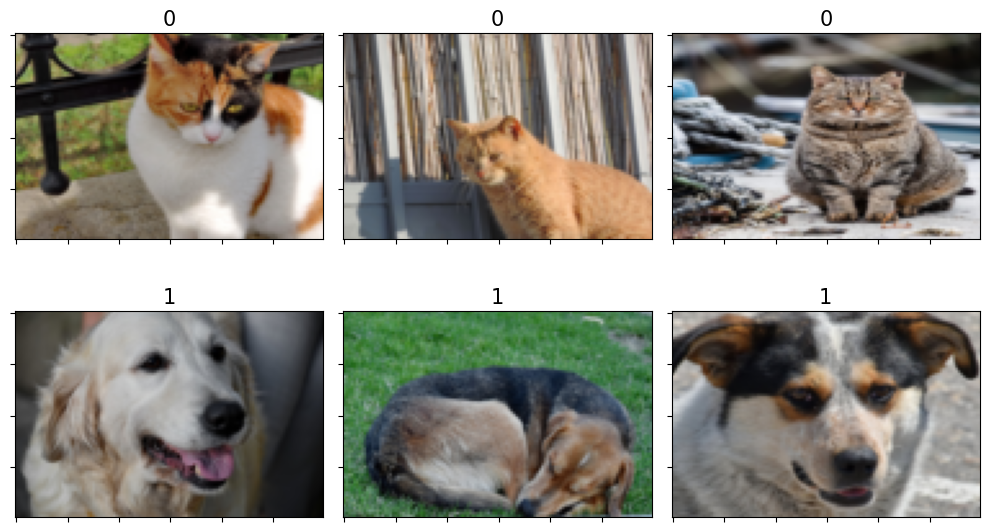

In [37]:
import torchvision.transforms as transforms

img_height, img_width = 80, 120  # (H, W)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])


class ImageDataset(Dataset):
    def __init__(self, files: list, labels: list, transform=None):
        self.files = files
        self.labels = labels
        self.transform = transform

    def __getitem__(self, idx):
        img = Image.open(self.files[idx])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

    def __len__(self):
        return len(self.labels)


catdog_dataset = ImageDataset(files=file_list, labels=labels, transform=transform)
fig = plt.figure(figsize=(10, 6))
for batch_idx, batch in enumerate(catdog_dataset):
    ax = fig.add_subplot(2, 3, batch_idx + 1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(batch[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f"{batch[1]}", size=15)
plt.tight_layout()
plt.show()

In [ ]:
from torchvision.datasets import ImageFolder
cats_dogs_dataset = ImageFolder(root='E:/AIdata/kagglePets/', transform=transforms.ToTensor())
print(cats_dogs_dataset)

In [ ]:
'''images stored in PIL.Image format'''
from PIL import Image
image = Image.open(IMAGE_PATH)

In [1]:
import torchvision
IMAGE_PATH = 'E:/AIdata/vi-torch/'
CelebA_dataset = torchvision.datasets.CelebA(root=IMAGE_PATH, download=True, split='train', target_type='attr')

FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.